In [1]:
# Target variable: FraudFound_P = 1 or 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/fraud_oracle.csv')

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

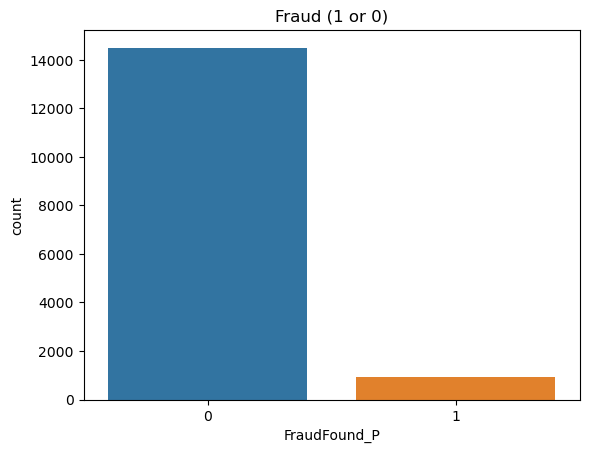

In [6]:
# to see the distribution of the target variable 'FraudFound_P'
sns.countplot(data=df, x='FraudFound_P')
plt.title('Fraud (1 or 0)');

In [7]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [8]:
# Class imbalanced observed, Fraud cases only accounts of 5.9%
pd.DataFrame(100*df['FraudFound_P'].value_counts()/len(df))

,count
FraudFound_P,
0,94.014267
1,5.985733


In [9]:
# to check for missing variables
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [10]:
# to check for duplicated values in dataset
duplicates = df[df.duplicated()]

In [11]:
# there are no duplicated rows
duplicates

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [12]:
# to see the total number vehicle insurance claimed by month
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [13]:
# to remove the outlier '0' in 'MonthClaimed'
df = df[df['MonthClaimed']!= '0']

In [14]:
# total number of vehical insurance claim by month
pd.DataFrame(df['MonthClaimed'].value_counts())

,count
MonthClaimed,
Jan,1446
May,1411
Mar,1348
Oct,1339
Jun,1293
Feb,1287
Nov,1285
Apr,1271
Sep,1242


In [15]:
# to see 'object' variables in dataset
df.select_dtypes('object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [16]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

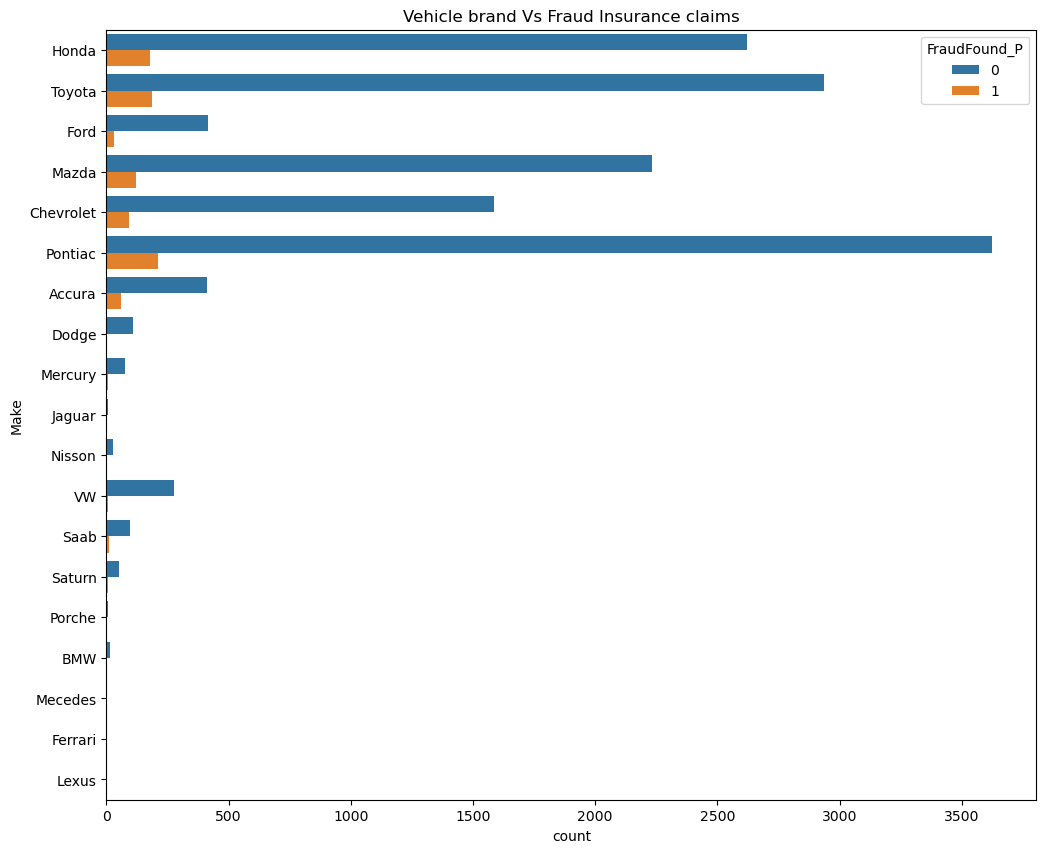

In [17]:
# Brands: 'Pontiac', 'Honda', 'Toyota' is observed to have higher fraud claims than the rest
plt.figure(figsize=(12,10), dpi=100)
sns.countplot(data=df, y='Make', hue='FraudFound_P')
plt.title('Vehicle brand Vs Fraud Insurance claims');

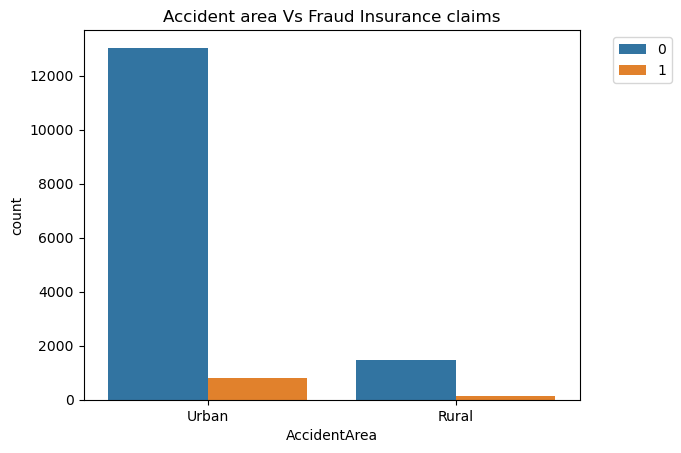

In [18]:
# Urban areas is observed to have higher 'Fraud' vehicle claims
sns.countplot(data=df, x='AccidentArea', hue='FraudFound_P')
plt.title('Accident area Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [19]:
df['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday'], dtype=object)

In [20]:
dayofweekclaimed_order = ['Monday',
                          'Tuesday',
                          'Wednesday',
                          'Thursday',
                          'Friday',
                          'Saturday',
                          'Sunday']

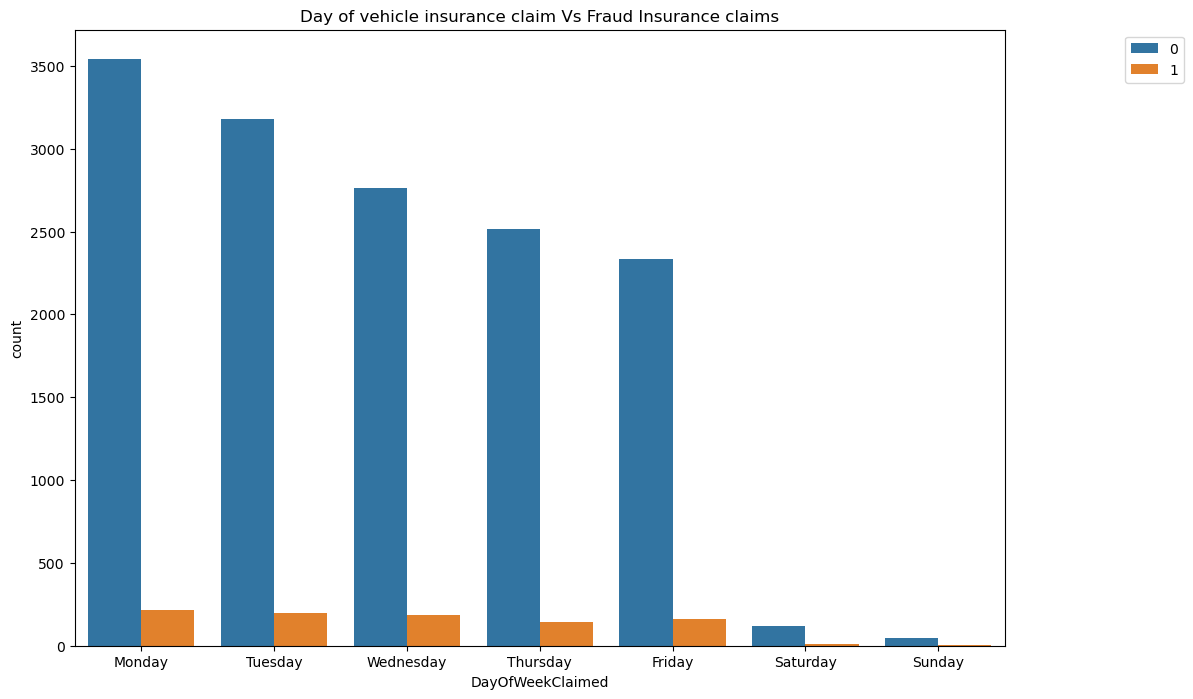

In [21]:
# 'Mon', 'Tue','Wed' is observed to have high fraud vehicle insurance claims
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='DayOfWeekClaimed', order = dayofweekclaimed_order, hue='FraudFound_P')
plt.title('Day of vehicle insurance claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

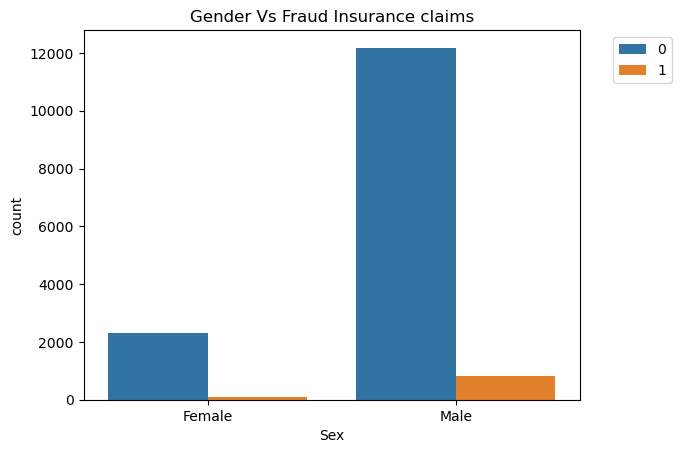

In [22]:
# Males are observed to have a higher Fraud Vehical Insurance claims
sns.countplot(data=df, x='Sex', hue='FraudFound_P')
plt.title('Gender Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

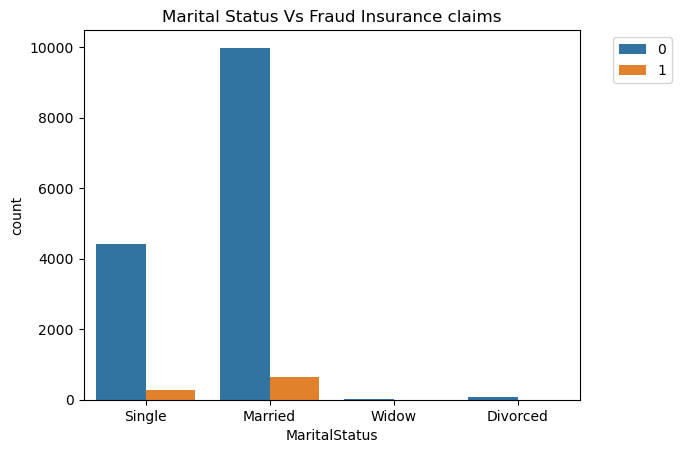

In [23]:
# Policy holders who are married are observed to have higher Fraud insurance claims
sns.countplot(data=df, x='MaritalStatus', hue='FraudFound_P')
plt.title('Marital Status Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [24]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [25]:
ageofpolicyholder_order = ['16 to 17',
                           '18 to 20',
                          '21 to 25',
                          '26 to 30',
                          '31 to 35',
                          '36 to 40',
                          '41 to 50',
                          '51 to 65',
                          'over 65']

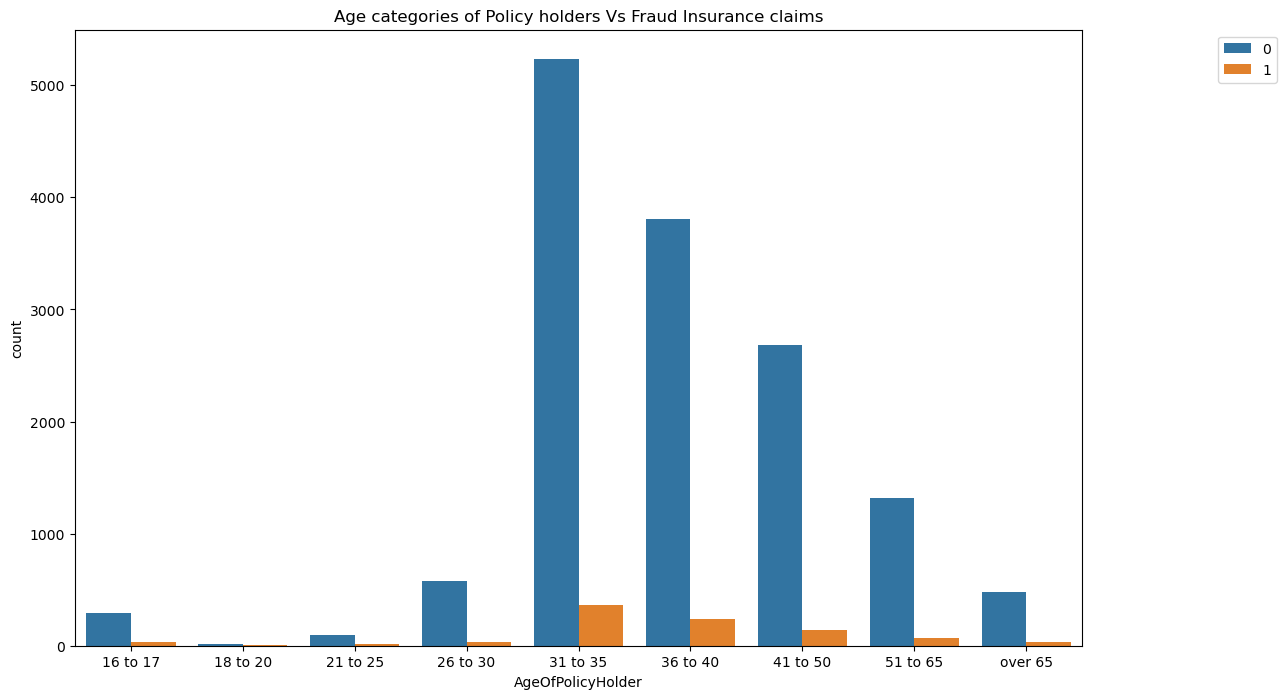

In [26]:
# '31 to 35' and '36 to 40 age group seems to have the highest Fraud Vehical claims
plt.figure(figsize=(13,8), dpi=100)
sns.countplot(data=df, x='AgeOfPolicyHolder', order = ageofpolicyholder_order, hue='FraudFound_P')
plt.title('Age categories of Policy holders Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

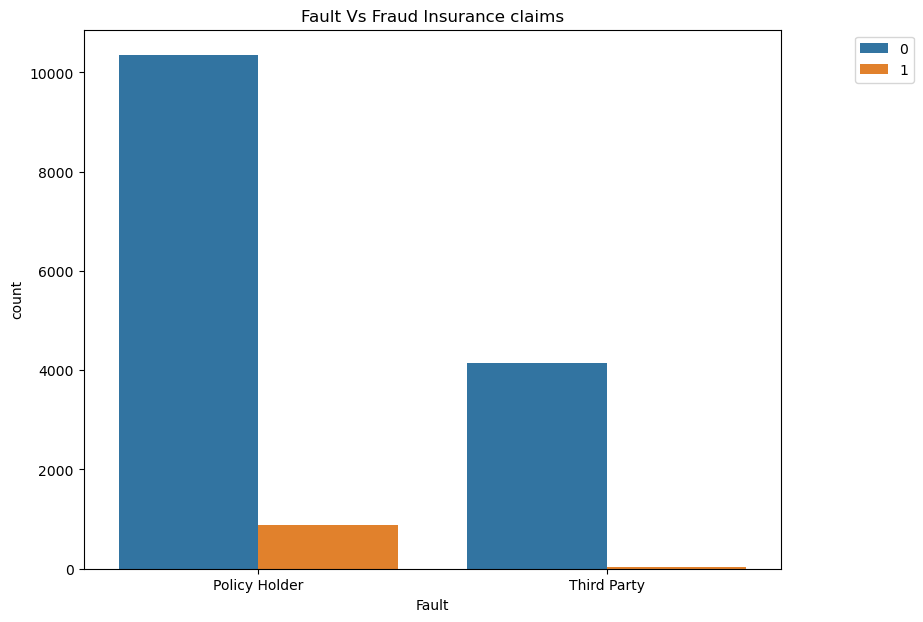

In [27]:
plt.figure(figsize=(9,7), dpi=100)
sns.countplot(data=df, x='Fault', hue='FraudFound_P')
plt.title('Fault Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

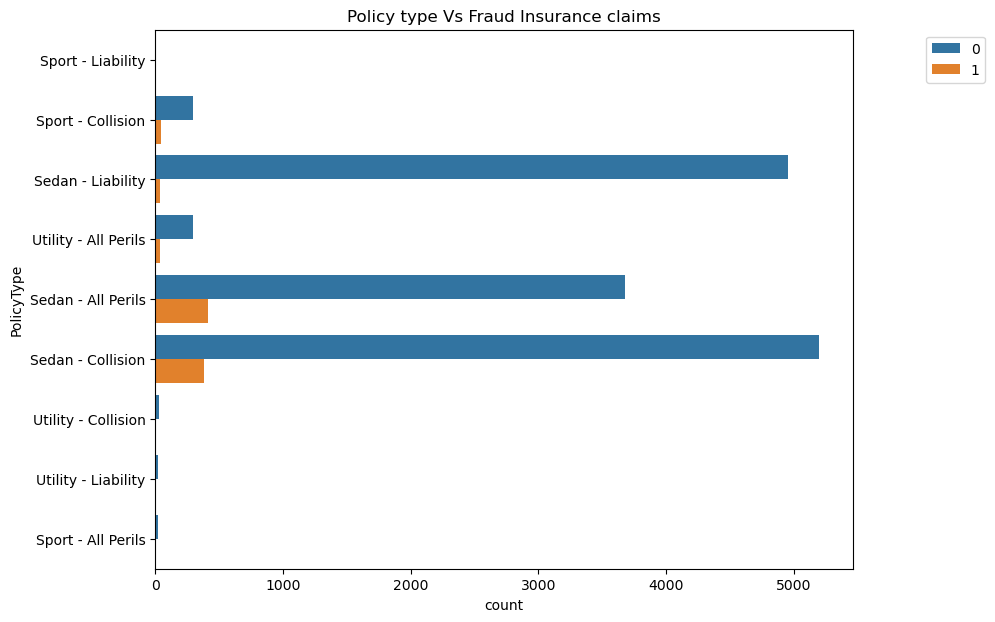

In [28]:
# Sedan is observed to have higher Vehicle fraud insurance claims 
plt.figure(figsize=(9,7), dpi=100)
sns.countplot(data=df, y='PolicyType', hue='FraudFound_P')
plt.title('Policy type Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

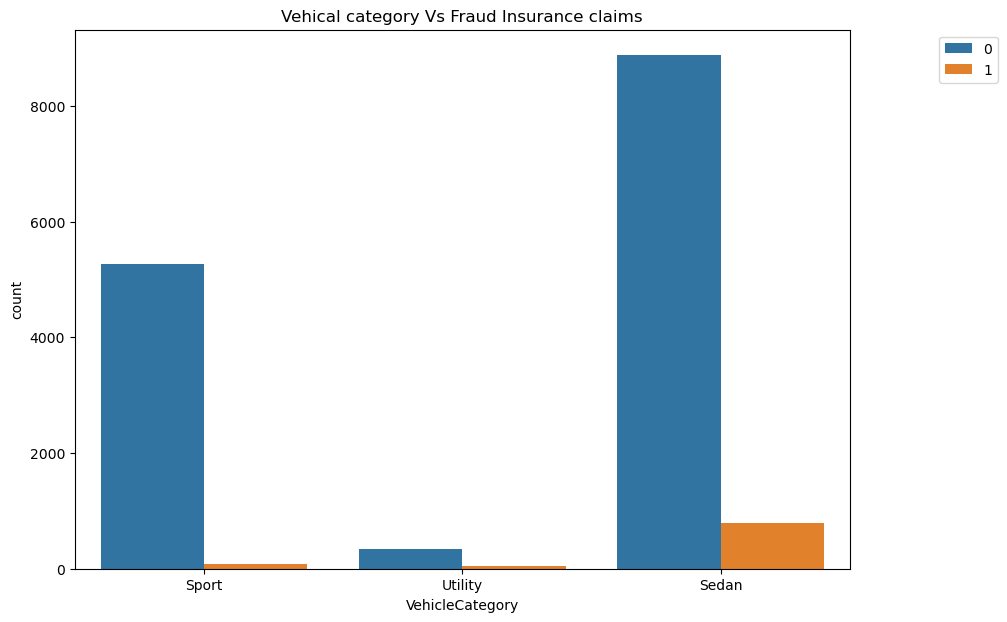

In [29]:
plt.figure(figsize=(10,7), dpi=100)
sns.countplot(data=df, x='VehicleCategory', hue='FraudFound_P')
plt.title('Vehical category Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [30]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [31]:
vehicleprice_order = ['less than 20000',
                      '20000 to 29000',
                      '30000 to 39000',
                      '40000 to 59000',
                      '60000 to 69000',
                      'more than 69000']

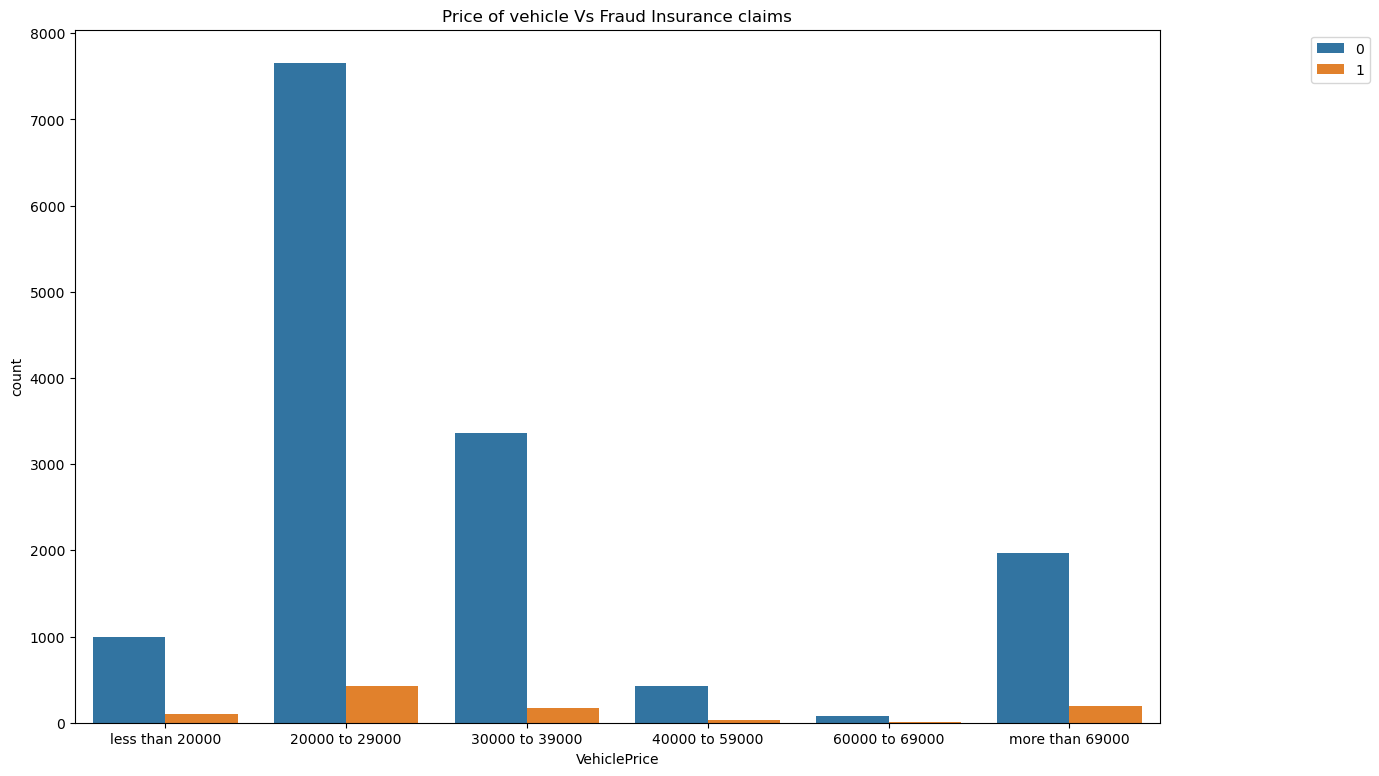

In [32]:
plt.figure(figsize=(14,9), dpi=100)
sns.countplot(data=df, x='VehiclePrice', order =vehicleprice_order, hue='FraudFound_P')
plt.title('Price of vehicle Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

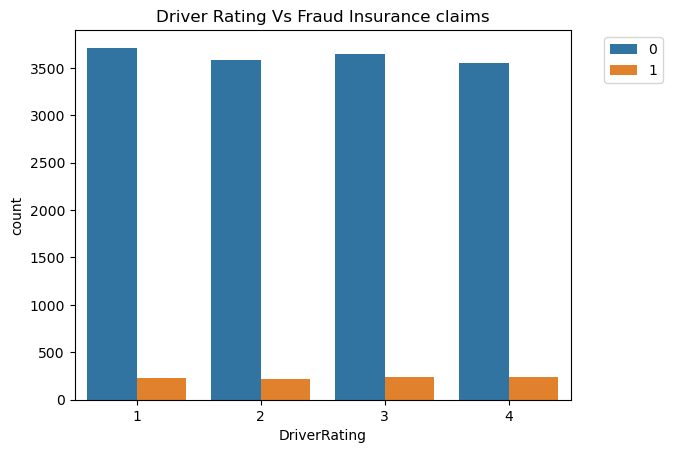

In [33]:
# it is observed that all ratings have equal number of Fraud vehical insurance claims
sns.countplot(data=df, x='DriverRating', hue='FraudFound_P')
plt.title('Driver Rating Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [34]:
df['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [35]:
dayspolicyaccident_order = ['none',
                            '1 to 7',
                            '8 to 15',
                            '15 to 30',
                            'more than 30']

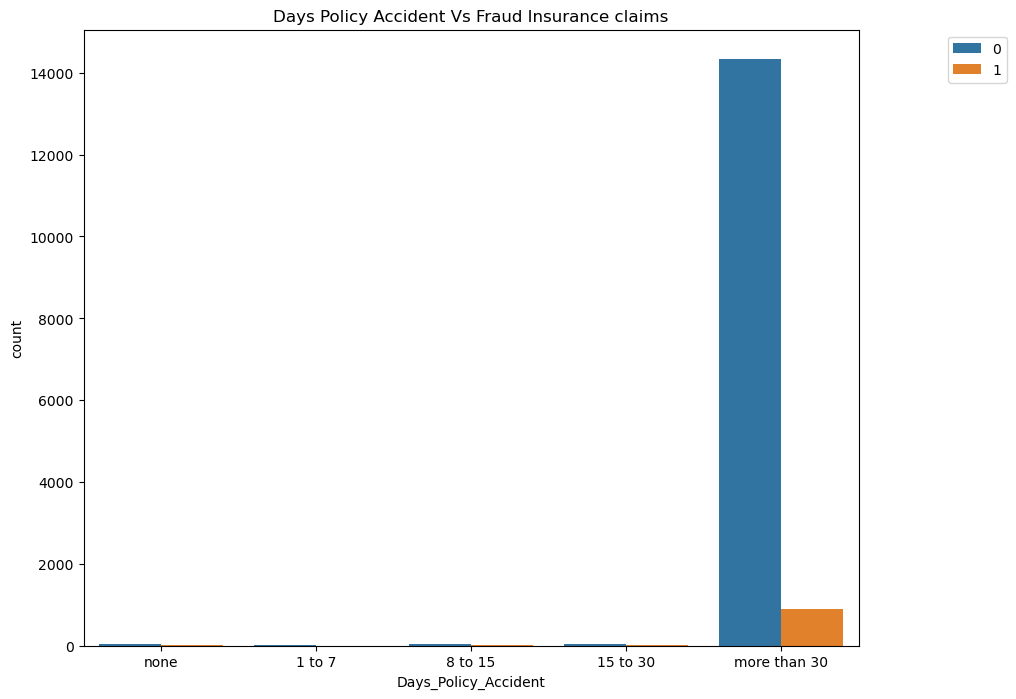

In [36]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Accident', order = dayspolicyaccident_order, hue='FraudFound_P')
plt.title('Days Policy Accident Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [37]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15'], dtype=object)

In [38]:
dayspolicyclaim_order = ['8 to 15',
                         '15 to 30',
                         'more than 30']

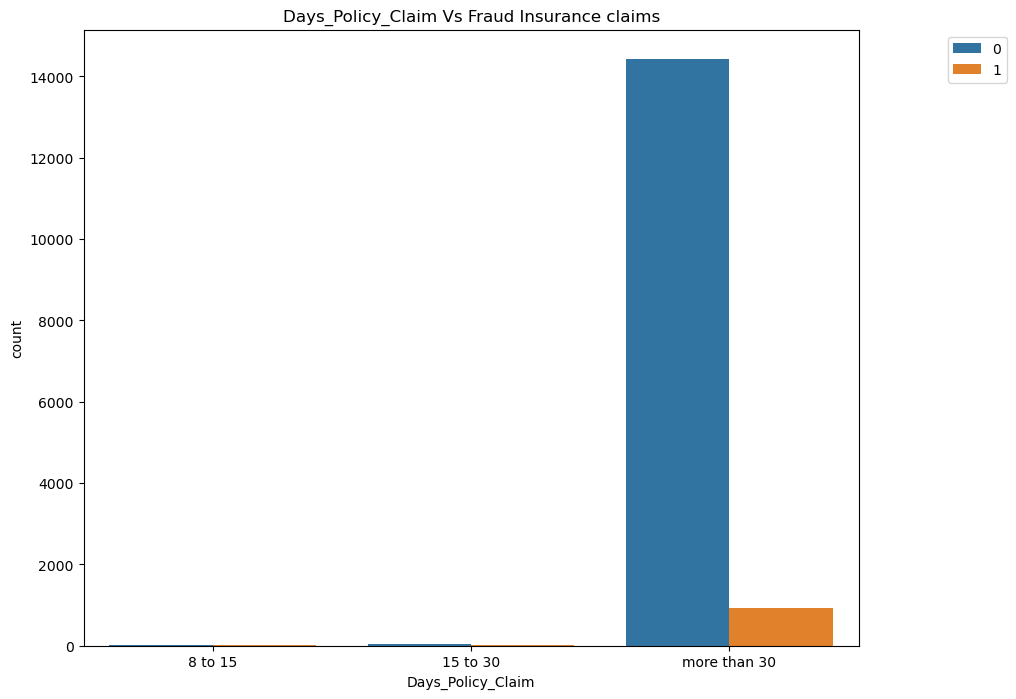

In [39]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Claim', order= dayspolicyclaim_order, hue='FraudFound_P')
plt.title('Days_Policy_Claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

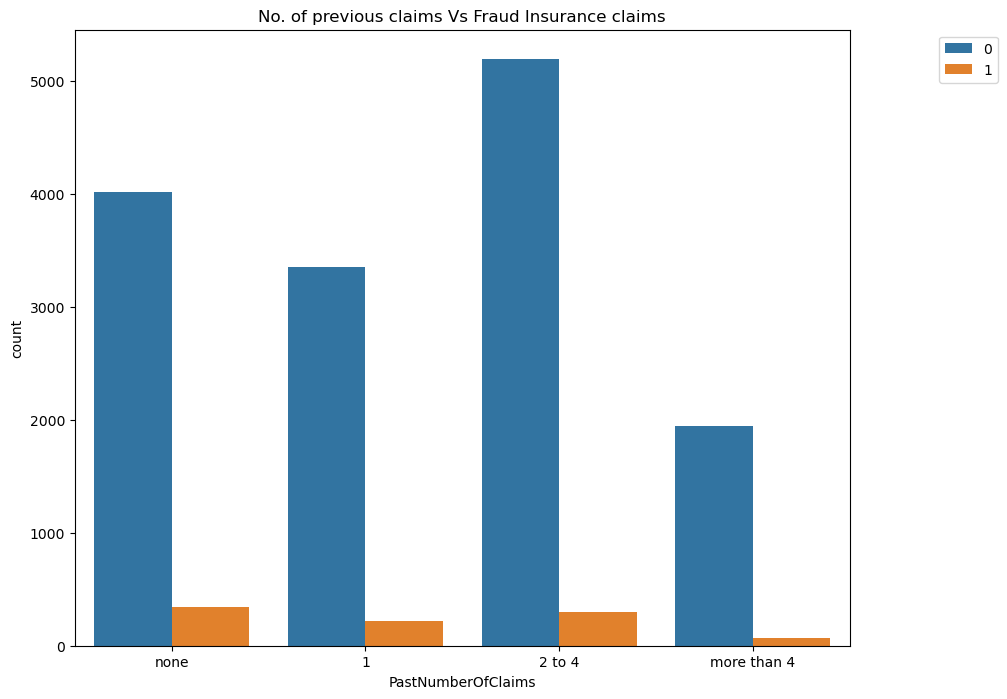

In [40]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='PastNumberOfClaims', hue='FraudFound_P')
plt.title('No. of previous claims Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [41]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [42]:
ageofvehicle_order = ['new',
                      '2 years',
                      '3 years',
                      '4 years',
                      '5 years',
                      '6 years',
                      '7 years',
                      'more than 7']

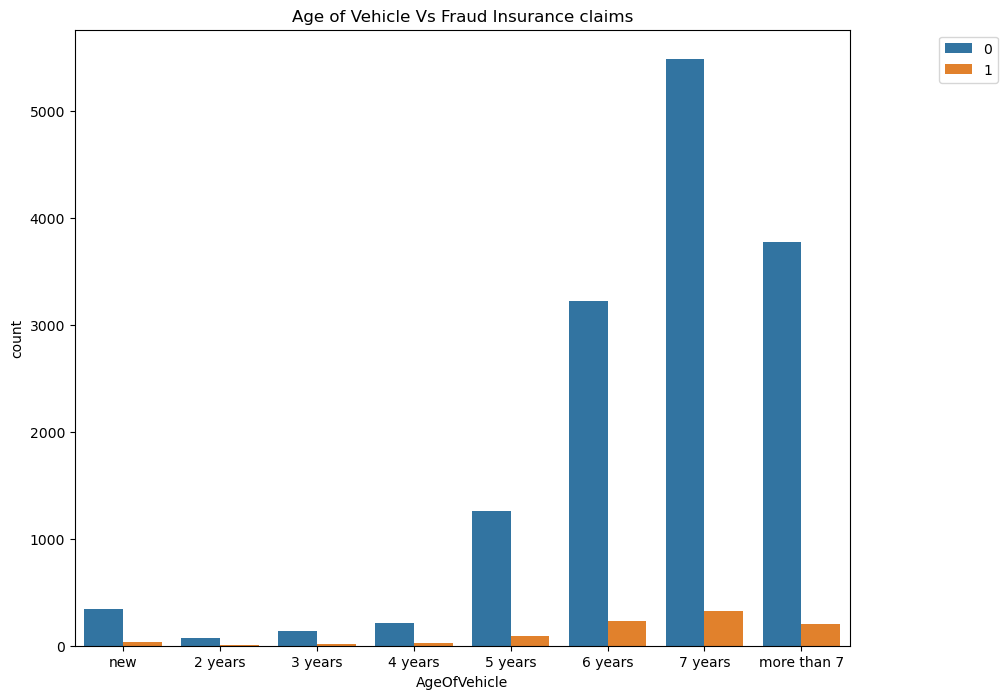

In [43]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='AgeOfVehicle', order= ageofvehicle_order, hue='FraudFound_P')
plt.title('Age of Vehicle Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

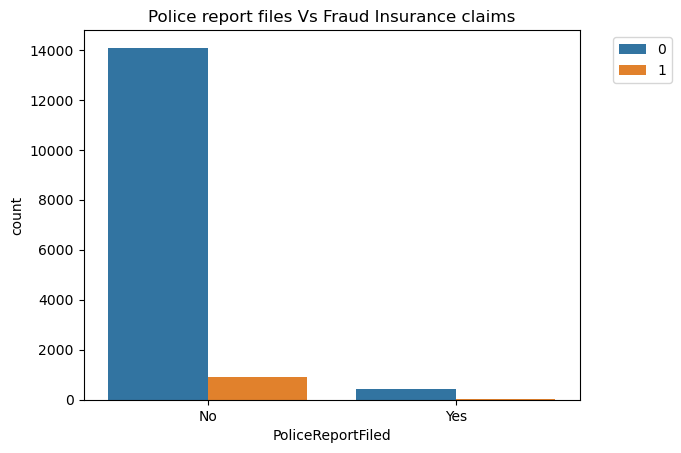

In [98]:
sns.countplot(data=df, x='PoliceReportFiled', hue='FraudFound_P')
plt.title('Police report files Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

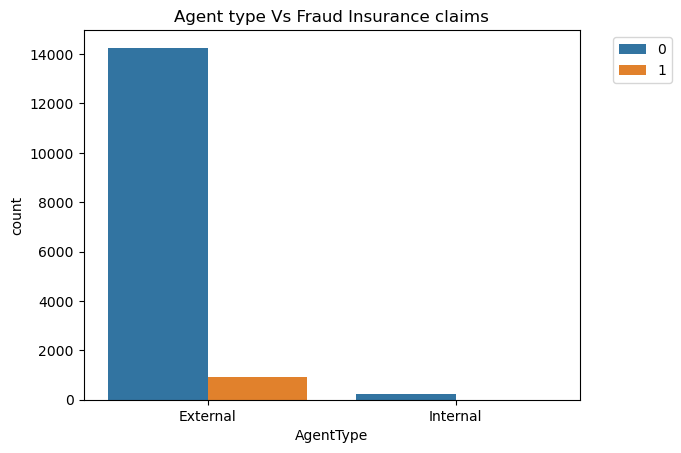

In [44]:
sns.countplot(data=df, x='AgentType', hue='FraudFound_P')
plt.title('Agent type Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

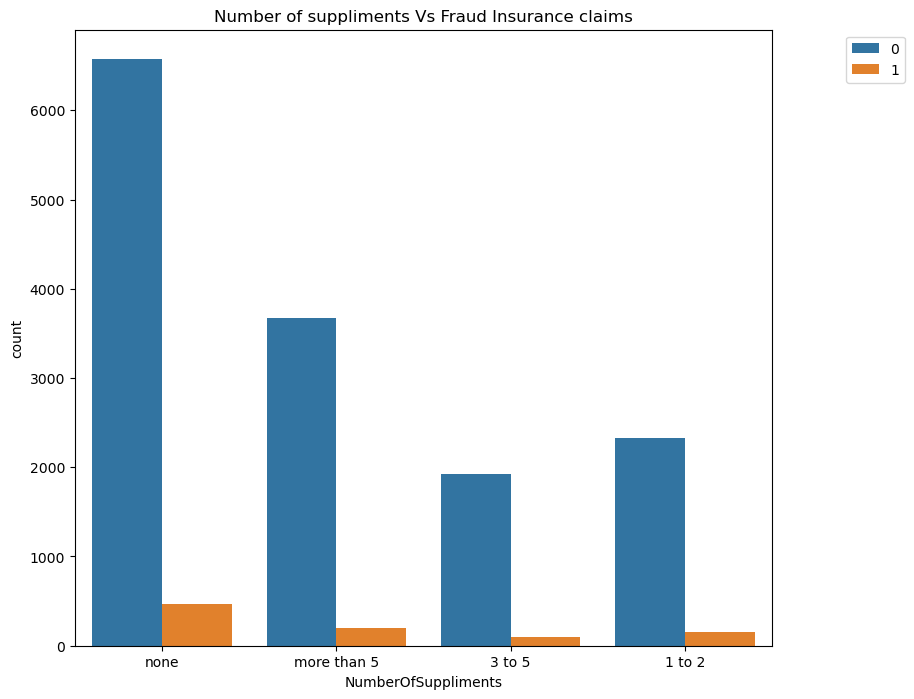

In [45]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='NumberOfSuppliments', hue='FraudFound_P')
plt.title('Number of suppliments Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [46]:
df['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [47]:
addresschangeclaim_order = ['no change',
                            'under 6 months',
                            '1 year',
                            '2 to 3 years',
                            '4 to 8 years']

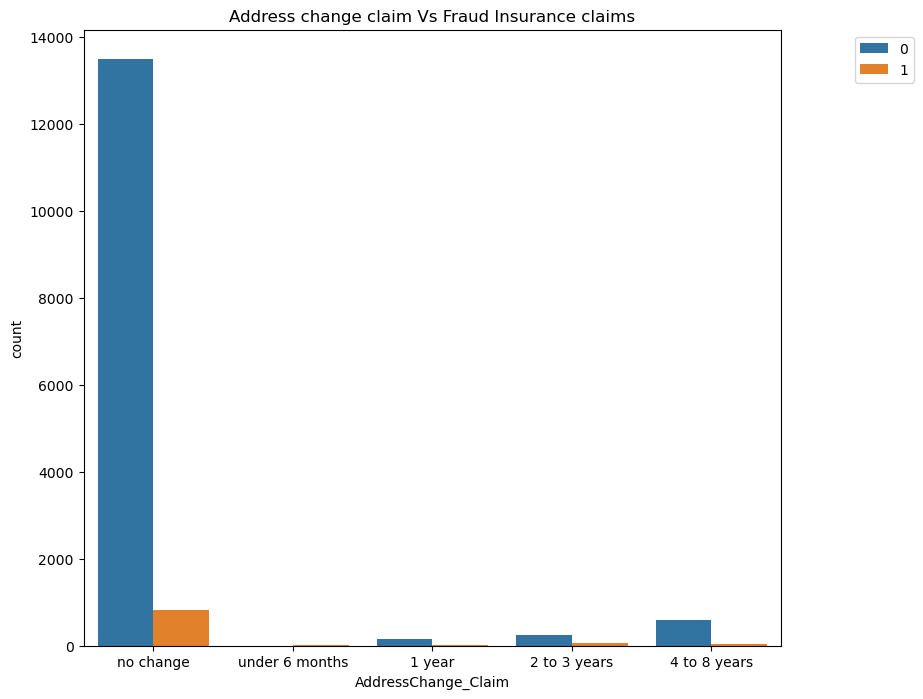

In [48]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='AddressChange_Claim', order=addresschangeclaim_order, hue='FraudFound_P')
plt.title('Address change claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [49]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [50]:
numberofcars_order = ['1 vehicle',
                      '2 vehicles',
                      '3 to 4',
                      '5 to 8',
                      'more than 8']

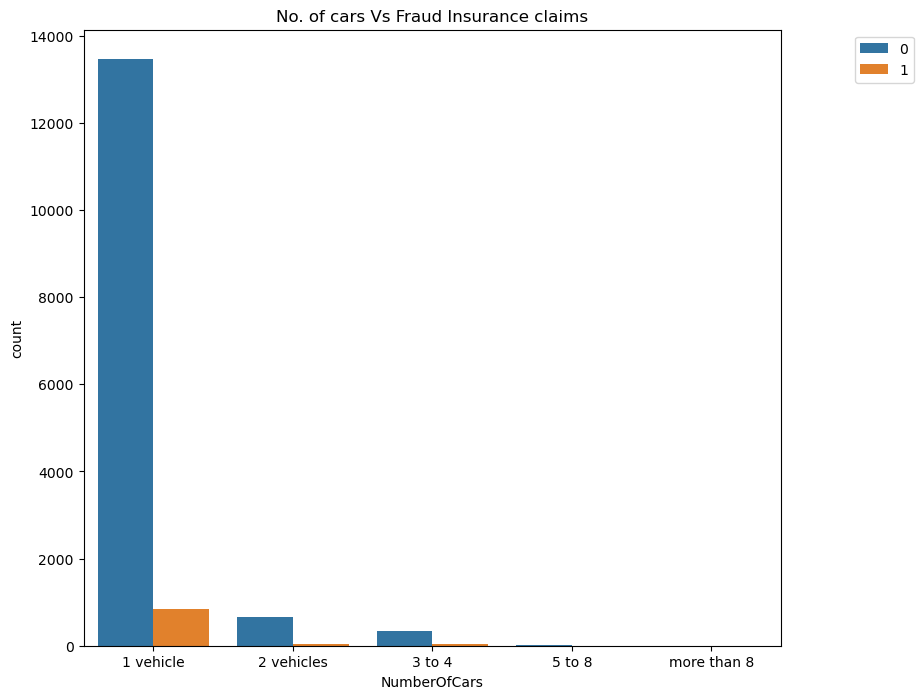

In [51]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='NumberOfCars', order= numberofcars_order, hue='FraudFound_P')
plt.title('No. of cars Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [52]:
# to see the number of Vehical insurances claim by year
# 1994 has the highest vehicle insurance claim
pd.DataFrame(df['Year'].value_counts())

,count
Year,
1994,6141
1995,5195
1996,4083


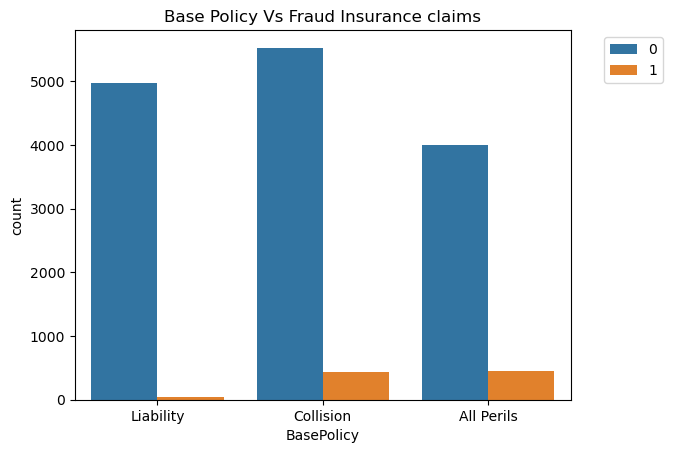

In [53]:
# Collison and all perils has the highest fraud insurance claims
sns.countplot(data=df, x='BasePolicy', hue='FraudFound_P')
plt.title('Base Policy Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

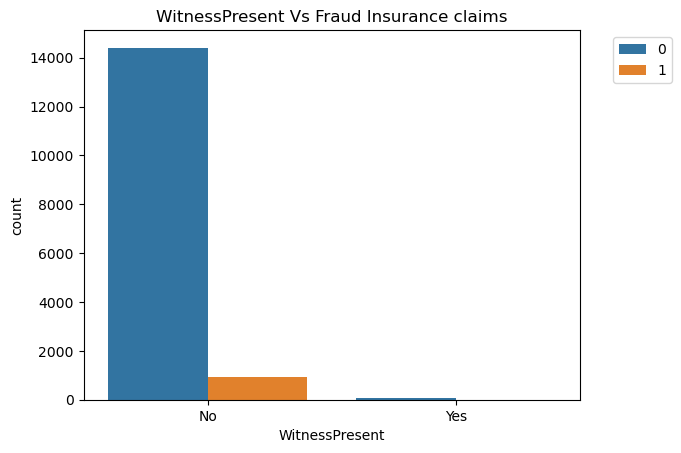

In [54]:
sns.countplot(data=df, x='WitnessPresent', hue='FraudFound_P')
plt.title('WitnessPresent Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [55]:
# to see numeric variables in dataset
df.select_dtypes('int')

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


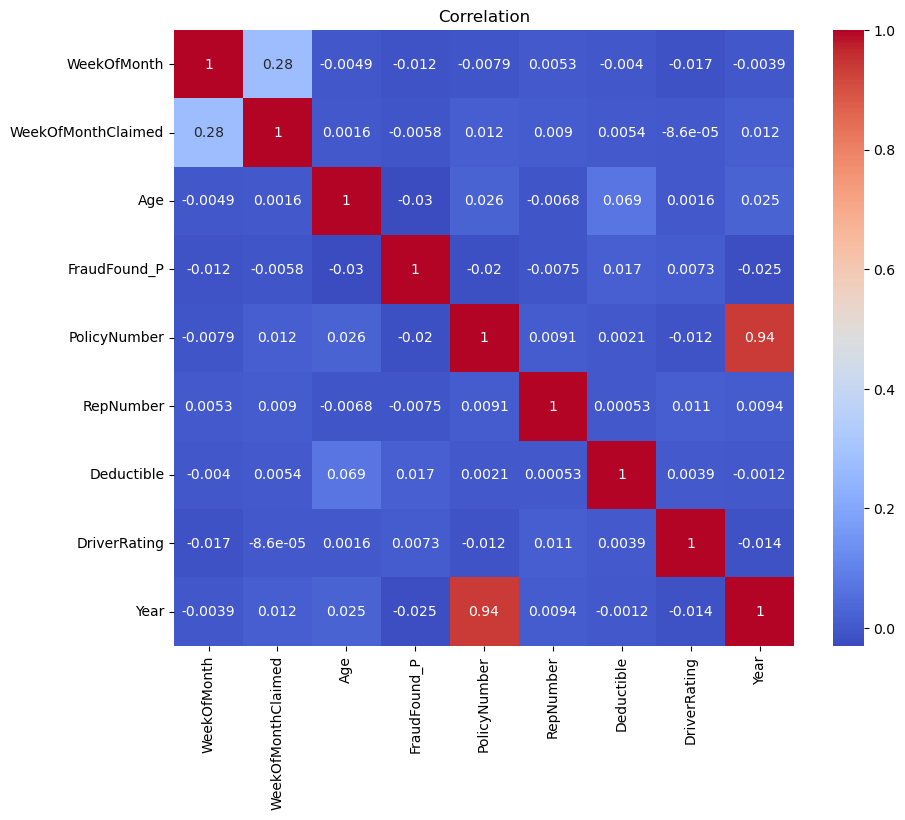

In [56]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.select_dtypes('int').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation');

In [57]:
# 'Deductible' is highly correlated with target variable
# to see correlated values against targetted variables
df.select_dtypes('int').corr()['FraudFound_P'].sort_values(ascending=False)

FraudFound_P          1.000000
Deductible            0.017345
DriverRating          0.007259
WeekOfMonthClaimed   -0.005783
RepNumber            -0.007529
WeekOfMonth          -0.011872
PolicyNumber         -0.020369
Year                 -0.024778
Age                  -0.029798
Name: FraudFound_P, dtype: float64

In [58]:
# to remove repeatitive columns before ML algorithm
df = df.drop(['Month','WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber'], axis=1)

In [59]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DayOfWeek             15419 non-null  object
 1   Make                  15419 non-null  object
 2   AccidentArea          15419 non-null  object
 3   DayOfWeekClaimed      15419 non-null  object
 4   MonthClaimed          15419 non-null  object
 5   Sex                   15419 non-null  object
 6   MaritalStatus         15419 non-null  object
 7   Fault                 15419 non-null  object
 8   PolicyType            15419 non-null  object
 9   VehicleCategory       15419 non-null  object
 10  VehiclePrice          15419 non-null  object
 11  FraudFound_P          15419 non-null  int64 
 12  Deductible            15419 non-null  int64 
 13  DriverRating          15419 non-null  int64 
 14  Days_Policy_Accident  15419 non-null  object
 15  Days_Policy_Claim     15419 non-null  obj

In [60]:
# to define X and y
X = df.drop('FraudFound_P', axis=1)

In [61]:
# to convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [62]:
y = df['FraudFound_P']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
# testing data= 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
# to scale the dataset first as they are of unequal dimension
scaler = StandardScaler()

In [67]:
scaled_X_train = scaler.fit_transform(X_train)

In [68]:
scaled_X_test = scaler.transform(X_test)

In [69]:
# to do oversampling via SMOTE as the positive cases is imbalanced for target variable in 'Fraud'
from imblearn.over_sampling import SMOTE

In [70]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (10793,)
Number transactions y_test dataset:  (4626,)


In [71]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 641
Before OverSampling, counts of label '0': 10152 



In [72]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

In [73]:
# to check the length of both X and y training set after Oversampling with SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# to resample positve cases in both  Y train and test set, after over sampling both 1 and 0 cases are equal
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (20304, 105)
After OverSampling, the shape of train_y: (20304,) 

After OverSampling, counts of label '1': 10152
After OverSampling, counts of label '0': 10152


In [74]:
# to import ML algorithm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [75]:
from xgboost import XGBClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
rf = RandomForestClassifier()

In [78]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [79]:
rf_pred = rf.predict(scaled_X_test)

In [80]:
rf_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [82]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred)) # Random Forest classifer model achieved 94% accuracy

[[4341    3]
 [ 279    3]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4344
           1       0.50      0.01      0.02       282

    accuracy                           0.94      4626
   macro avg       0.72      0.50      0.49      4626
weighted avg       0.91      0.94      0.91      4626



In [84]:
gb = GradientBoostingClassifier()

In [86]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [87]:
gb_pred = gb.predict(scaled_X_test)

In [108]:
print(confusion_matrix(y_test,gb_pred))
print('\n')
print(classification_report(y_test,gb_pred)) # Gradient Boost classifier model achieved 94% accuracy rate

[[4329   15]
 [ 267   15]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4344
           1       0.50      0.05      0.10       282

    accuracy                           0.94      4626
   macro avg       0.72      0.52      0.53      4626
weighted avg       0.91      0.94      0.92      4626



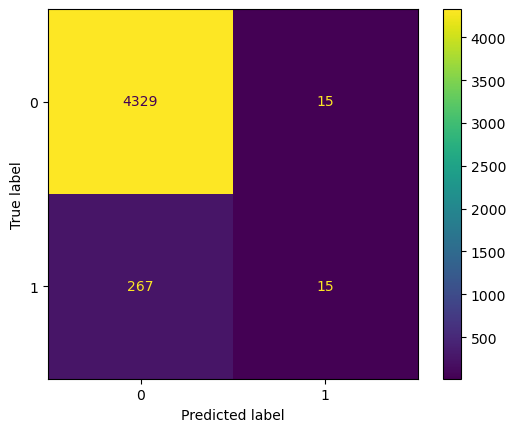

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test,gb_pred)

In [89]:
xg = XGBClassifier()

In [90]:
xg.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
xg_pred = xg.predict(scaled_X_test)

In [92]:
print(confusion_matrix(y_test,xg_pred))
print('\n')
print(classification_report(y_test,xg_pred)) # XGBoost classifer model achieved 94% accuracy rate

[[4306   38]
 [ 260   22]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4344
           1       0.37      0.08      0.13       282

    accuracy                           0.94      4626
   macro avg       0.65      0.53      0.55      4626
weighted avg       0.91      0.94      0.92      4626



In [93]:
dt = DecisionTreeClassifier()

In [94]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [95]:
dt_pred = dt.predict(scaled_X_test)

In [96]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Decision tree classifer model achieved 89% accuracy rate

[[4051  293]
 [ 235   47]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4344
           1       0.14      0.17      0.15       282

    accuracy                           0.89      4626
   macro avg       0.54      0.55      0.54      4626
weighted avg       0.90      0.89      0.89      4626



In [97]:
ada = AdaBoostClassifier()

In [98]:
ada.fit(X_train_res, y_train_res)

AdaBoostClassifier()

In [99]:
ada_pred = ada.predict(scaled_X_test)

In [101]:
print(confusion_matrix(y_test,ada_pred))
print('\n')
print(classification_report(y_test,ada_pred)) # AdaBoost classifer model achieved 90% accuracy rate

[[4127  217]
 [ 234   48]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4344
           1       0.18      0.17      0.18       282

    accuracy                           0.90      4626
   macro avg       0.56      0.56      0.56      4626
weighted avg       0.90      0.90      0.90      4626



In [102]:
from sklearn.linear_model import LogisticRegressionCV

In [103]:
log = LogisticRegressionCV()

In [104]:
log.fit(X_train_res, y_train_res)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()

In [105]:
log_pred = log.predict(scaled_X_test)

In [106]:
# to print first 10 classification predictions
log_pred[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [135]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred)) # Logistic Regression model achieve 67% accuracy rate

[[2890 1454]
 [  57  225]]


              precision    recall  f1-score   support

           0       0.98      0.67      0.79      4344
           1       0.13      0.80      0.23       282

    accuracy                           0.67      4626
   macro avg       0.56      0.73      0.51      4626
weighted avg       0.93      0.67      0.76      4626



In [113]:
gb.feature_importances_

array([1.79268440e-05, 1.59696232e-01, 3.53852160e-02, 2.80100575e-03,
       1.53806349e-03, 7.41688349e-04, 9.32230378e-03, 1.56826871e-02,
       8.93189021e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.07452151e-05, 9.05210654e-04, 0.00000000e+00,
       0.00000000e+00, 2.10088687e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.17397792e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.78961118e-03, 0.00000000e+00, 0.00000000e+00,
       1.86710536e-02, 3.47250975e-05, 1.43886350e-04, 1.17641085e-02,
       1.07107718e-02, 8.18485061e-03, 4.18901933e-04, 1.10812475e-03,
       4.51410637e-04, 2.64761091e-04, 1.94821764e-03, 0.00000000e+00,
       6.12427269e-04, 2.85428780e-03, 7.06144150e-03, 6.41052235e-04,
       1.35991827e-03, 1.75804842e-02, 6.75002736e-03, 0.00000000e+00,
       3.40280457e-05, 1.70072833e-01, 5.84470475e-02, 1.15681246e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.66075492e-04,
      

In [114]:
gb_imp = gb.feature_importances_

In [115]:
X.columns

Index(['Deductible', 'DriverRating', 'Year', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Make_BMW',
       ...
       'AddressChange_Claim_2 to 3 years', 'AddressChange_Claim_4 to 8 years',
       'AddressChange_Claim_no change', 'AddressChange_Claim_under 6 months',
       'NumberOfCars_2 vehicles', 'NumberOfCars_3 to 4', 'NumberOfCars_5 to 8',
       'NumberOfCars_more than 8', 'BasePolicy_Collision',
       'BasePolicy_Liability'],
      dtype='object', length=105)

In [117]:
gb_imp = pd.DataFrame(data= gb_imp, index= X.columns, columns=['Importance'])

In [120]:
gb_imp = gb_imp.sort_values('Importance', ascending=False)

In [121]:
gb_imp

,Importance
BasePolicy_Liability,0.218873
Fault_Third Party,0.170073
DriverRating,0.159696
PolicyType_Sedan - Collision,0.058447
AddressChange_Claim_2 to 3 years,0.054567
...,...
MaritalStatus_Single,0.000000
MonthClaimed_Jun,0.000000
AccidentArea_Urban,0.000000
AgeOfPolicyHolder_18 to 20,0.000000


In [131]:
# to filter away importance of less than 0.015
imp_gb = gb_imp[gb_imp['Importance'] > 0.015]

In [132]:
imp_gb 

,Importance
BasePolicy_Liability,0.218873
Fault_Third Party,0.170073
DriverRating,0.159696
PolicyType_Sedan - Collision,0.058447
AddressChange_Claim_2 to 3 years,0.054567
NumberOfSuppliments_none,0.045678
PastNumberOfClaims_none,0.037685
Year,0.035385
PastNumberOfClaims_2 to 4,0.026978
DayOfWeekClaimed_Monday,0.018671


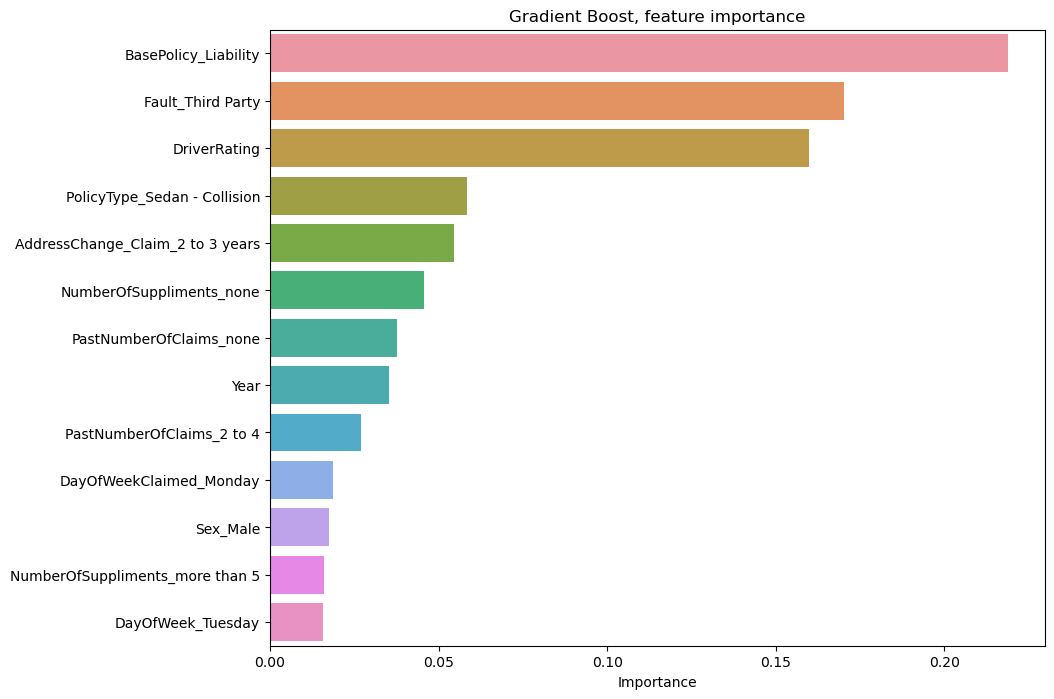

In [134]:
# Top 3 predictors whether the Vehicle insurance claim will be classified as Fraud: 'BasePolicy_Liability','Fault_3rd party','DriverRating'
# to plot a barplot of Gradient Boost Classifer, Feature importance, 94% accuracy
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=imp_gb, x='Importance', y=imp_gb.index)
plt.title('Gradient Boost, feature importance');